# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gymnasium: https://github.com/Farama-Foundation/Gymnasium (**New package to install**)
    - To install the base Gymnasium library, use **pip install gymnasium**

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gymnasium as gym

## Q1.3: Infitie Variance (extra credit)

In [ ]:
""" CODE HERE YOUR IMPLEMENTATION for Example 5.5 - Figure 5.4 """

def run_episode():
    # importance sampling ratio starts at 1
    rho = 1.0

    while True:
        # behavior policy picks left or right with equal probability
        if np.random.random() < 0.5:
            # chose left
            # update importance sampling ratio: pi(left|s)/b(left|s) = 1/0.5 = 2
            rho *= 2.0

            if np.random.random() < 0.1:
                # terminate with reward +1
                return rho * 1.0
            # else loop back to s with reward 0
        else:
            # chose right, terminate with reward 0
            # target policy never picks right so rho = 0
            return 0.0


def ordinary_importance_sampling(num_episodes, num_runs):
    # log spaced points for x axis like the textbook
    plot_points = np.unique(
        np.logspace(0, np.log10(num_episodes), num=500).astype(int)
    )

    # store all runs for plotting
    all_estimates = []

    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs}")
        # cumulative sum of importance sampled returns
        cumsum = 0.0
        estimates = []
        idx = 0

        for ep in range(1, num_episodes + 1):
            # generate one episode and get weighted return
            cumsum += run_episode()

            # record estimate at log spaced intervals
            if idx < len(plot_points) and ep == plot_points[idx]:
                # average of all returns so far
                estimates.append(cumsum / ep)
                idx += 1

        all_estimates.append(estimates)

    return plot_points, all_estimates


### Plotting Figure 5.4
#

print("Running 10,000,000 episodes x 10 runs")

# call simulation with 10 million episodes and 10 runs
num_episodes = 10_000_000
num_runs = 10
plot_points, all_estimates = ordinary_importance_sampling(num_episodes, num_runs)

print("Plotting Figure 5.4")

plt.figure(figsize=(10, 5.5))

# plot each run as a separate line
for run in range(num_runs):
    plt.plot(plot_points[:len(all_estimates[run])], all_estimates[run], linewidth=1)

# dotted horizontal lines at 1 and 2 like the textbook
plt.axhline(y=1, color='black', linestyle=':', linewidth=0.7)
plt.axhline(y=2, color='black', linestyle=':', linewidth=0.7)

# log scale x axis
plt.xscale('log')
plt.xlim(1, num_episodes)
plt.ylim(0, 3)

# axis labels matching the textbook figure
plt.ylabel(
    'Monte-Carlo estimate of\n$v_\\pi(s)$ with ordinary\n'
    'importance sampling\n(ten runs)',
    fontsize=10, multialignment='center'
)
plt.xlabel('Episodes (log scale)', fontsize=11)

# x axis ticks with commas like the textbook: 1, 10, 100, ...
tick_positions = [10**i for i in range(int(np.log10(num_episodes)) + 1)]
tick_labels = [f'{t:,}' for t in tick_positions]
plt.xticks(tick_positions, tick_labels)

plt.tight_layout()
plt.show()

print("Plotting Figure 5.4 complete")

Running 10,000,000 episodes x 10 runs


NameError: name 'np' is not defined

# Q2: Backjack 

Please note, since there is no scaffolding code for this question. Please make sure your implementation is well-tested and the comments are clear to understand. 

In [2]:
# test code for using the "Backjack" implementation from OpenAI
env = gym.make("Blackjack-v1")
env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    action = env.action_space.sample()
    
    # interact with the envrionment
    next_s, reward, done, info, _ = env.step(action)
    
    # print info
    print(f"t = {t}, next_state = {next_s}, reward = {reward}, done = {done}")
    
    # check termination
    if done:
        env.reset()

NameError: name 'gym' is not defined

## (a): Implement first-visit Monte-Carlo policy evaluation (See pseudocode in 5.1). 

Please read Example 5.1 and reproduce Figure 1. The policy to be evaluated is the "sticks only on 20 or 21". Please only reproduce the plots after 500, 000 episodes (Usable ace and No usable ace). 

Running 500000 episodes
plotting figure 5.1 complete


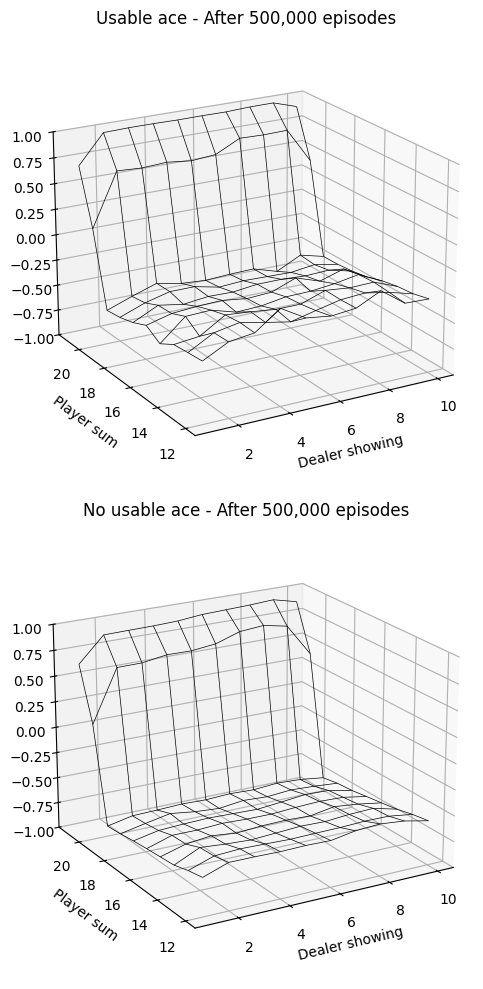

In [6]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(a) """

def policy_blackjack(player_sum):
    #if player sum is larger or equal to 20 then stick else hit
    if player_sum >= 20:
        return 0
    else:
        return 1


def first_visit_mc_prediction(num_episodes):

    #setup environment
    env = gym.make("Blackjack-v1")
    #value function and returrns deifned
    V = {}
    returns_sum = {}
    returns_count = {}

    for _ in range(num_episodes):
        state, _ = env.reset()
        episode = []
        done = False
        
        while not done:
            #generate episodes
            action = policy_blackjack(state[0])
            next_state, reward, done, info, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

            #define G sum of discounted rewards as 0
        G = 0
        visited = set()

            # loop for each step of episode
        for t in range(len(episode) - 1, -1, -1):
            # get state, action, reward for each episode
            S_t, A_t, R_t = episode[t]
            #sum of discounted rewards
            G += R_t

            #first time visit check 
            if S_t not in visited:
                visited.add(S_t)
                #no discount in blackjack since it doesnt matter
                returns_sum[S_t] = returns_sum.get(S_t, 0.0) + G
                returns_count[S_t] = returns_count.get(S_t, 0) + 1

                #get average of returns
                V[S_t] = returns_sum[S_t] / returns_count[S_t] 

    return V


### PLotting the figure 5.1
# 

print("Running 500000 episodes")

# call prediciton function with 500000 episodes
V = first_visit_mc_prediction(500000)
print("plotting figure 5.1 complete")

dealer_range = np.arange(1, 11) #what the dealer can show
player_range = np.arange(12, 22) #what the player sum

X, Y = np.meshgrid(dealer_range, player_range)

#fill the grids values
Z_usable = np.zeros((10, 10))
Z_no_usable = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        Z_usable[i, j] = V.get((player_range[i], dealer_range[j], True), 0.0)
        Z_no_usable[i, j] = V.get((player_range[i], dealer_range[j], False), 0.0)
fig = plt.figure(figsize=(12, 10))


#usavle ace plot
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax1.plot_wireframe(X, Y, Z_usable, color='black', linewidth=0.5)
ax1.set_xlabel('Dealer showing')
ax1.set_ylabel('Player sum')
ax1.set_zlim(-1, 1)
ax1.set_title('Usable ace - After 500,000 episodes')
ax1.view_init(elev=20, azim=-120)

#not usable ace plot

ax2 = fig.add_subplot(2, 1, 2, projection='3d')
ax2.plot_wireframe(X, Y, Z_no_usable, color='black', linewidth=0.5)
ax2.set_xlabel('Dealer showing')
ax2.set_ylabel('Player sum')
ax2.set_zlim(-1, 1)
ax2.set_title('No usable ace - After 500,000 episodes')
ax2.view_init(elev=20, azim=-120)
plt.tight_layout()
plt.show()
                    
               

## (b): Implement first-visit Monte-Carlo control with exploring starts (Monte-Carlo ES in 5.3). 

Please read the Example 5.1 and reproduce the Figure 5.2

Running 500,000 episodes...
Done!


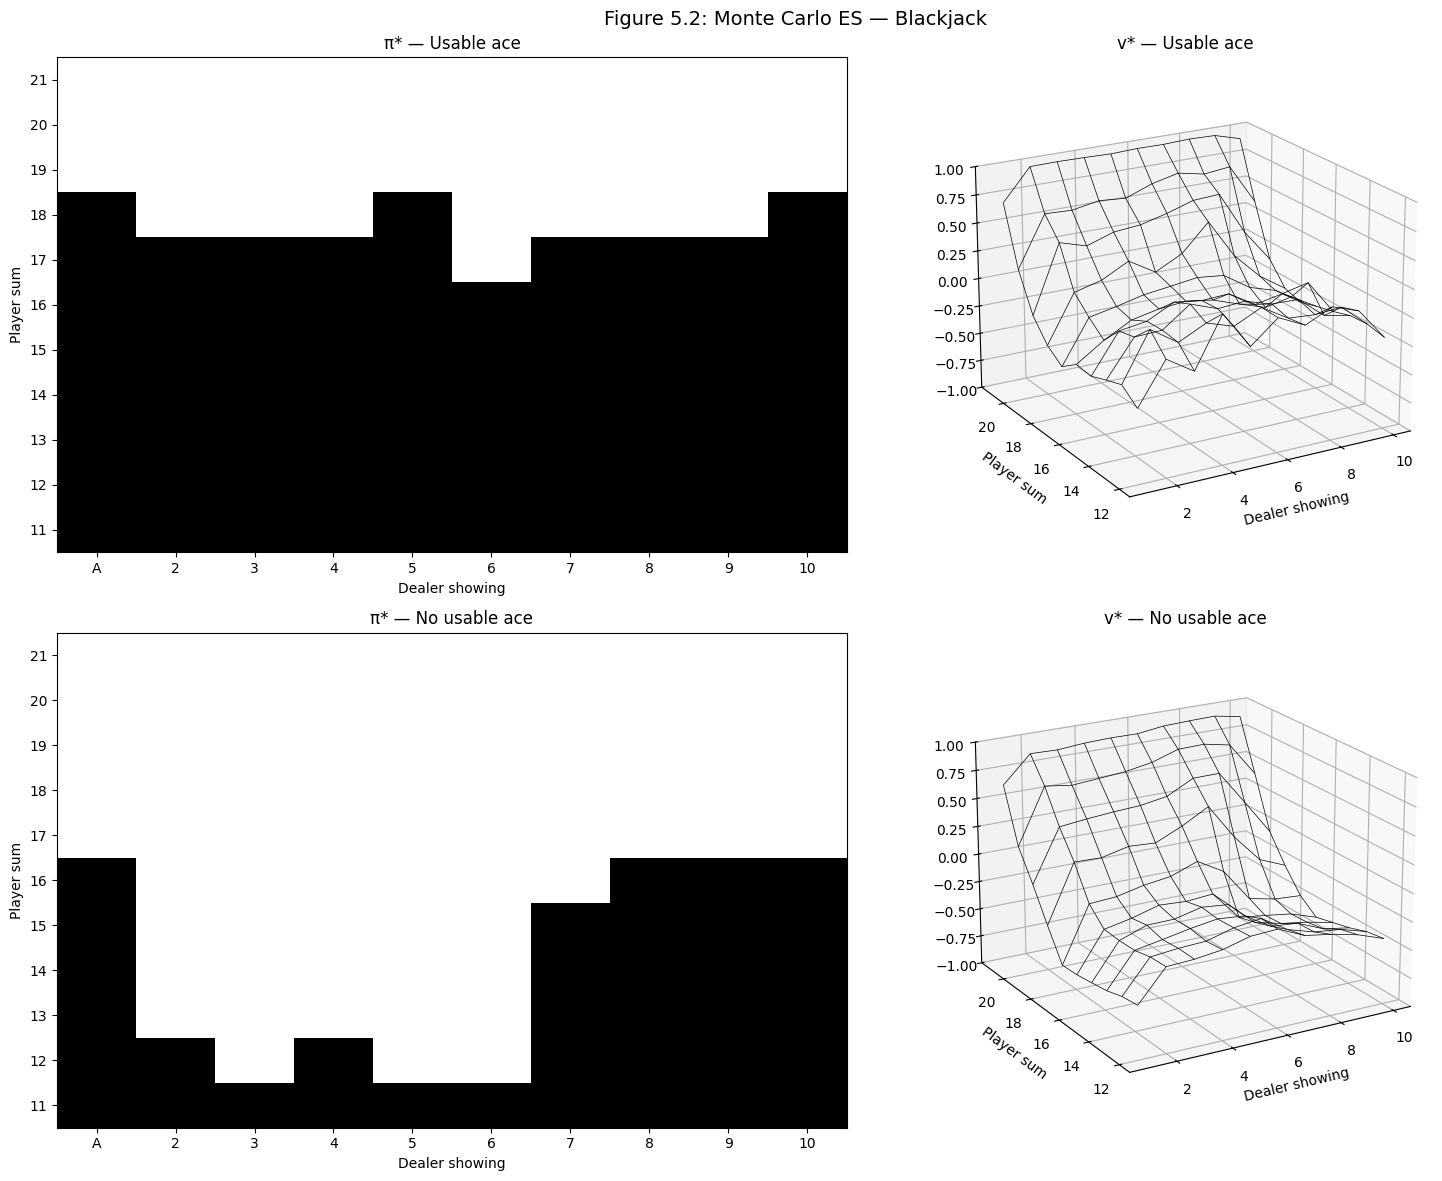

In [8]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(b) """

### monte carlo with exploring starts

def monte_carlo_es(num_episodes):

    env = gym.make("Blackjack-v1")

    #initialize q values, returns sum, count, arbitrary policy
    Q = {}
    returns_sum = {}
    returns_count = {}
    policy = {}
    
    for ep in range(num_episodes):
        
        #choose S0 and A0 randomly 
        state, _ = env.reset()
        first_action = random.choice([0,1]) #random choice

        #generate episodes all pairs probability > 0 (exploraing starts)
        episode = []
        done = False
        action = first_action
        
        while not done:
            next_state, reward, done, info, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state
            # after first step follow policy pi
            if not done:
                #default policy hit = 1
                action = policy.get(state, 1)

        #define G and visit set for first visit case
        G = 0
        visited = set()

        #loop each episode
        for t in range(len(episode)-1, -1, -1):
            #get that episodes state action and reward
            S_t, A_t, R_t = episode[t]
            #sum of discounted rewards but discount = 1 in blackjack
            G += R_t
            #state action pair
            sa = (S_t, A_t)

            #unless the pair appears append to returns 
            if sa not in visited:
                visited.add(sa)

                #append to the returns sum and count for use to average later
                returns_sum[sa] = returns_sum.get(sa, 0.0) + G
                returns_count[sa] = returns_count.get(sa, 0) + 1

                #update q values
                Q[sa] = returns_sum[sa] / returns_count[sa]

                #argmax policy pi
                q_stick = Q.get((S_t, 0), 0.0)
                q_hit = Q.get((S_t, 1), 0.0)
                if q_stick >= q_hit:
                    policy[S_t] = 0
                else:
                    policy[S_t] = 1
            

    return Q, policy



### plot figure 5.2
# run exploring starts mc 

print("Running 500,000 episodes...")
Q, policy = monte_carlo_es(500_000)
print("Done!")

#player and dealers potential shows
dealer_range = np.arange(1, 11)
player_range = np.arange(11, 22) 


policy_usable = np.zeros((11, 10))
policy_no_usable = np.zeros((11, 10))
for i, player in enumerate(range(11, 22)):

    for j, dealer in enumerate(range(1, 11)):

        policy_usable[i, j] = policy.get((player, dealer, True), 1)
        policy_no_usable[i, j] = policy.get((player, dealer, False), 1)

#value grids
X = np.arange(1, 11)
Y = np.arange(12, 22)

X_mesh, Y_mesh = np.meshgrid(X, Y)
Z_usable = np.zeros((10, 10))
Z_no_usable = np.zeros((10, 10))

for i, player in enumerate(range(12, 22)):
    for j, dealer in enumerate(range(1, 11)):
        state = (player, dealer, True)
        #
        Z_usable[i, j] = max(Q.get((state, 0), 0.0), Q.get((state, 1), 0.0))
        
        state = (player, dealer, False)
        Z_no_usable[i, j] = max(Q.get((state, 0), 0.0), Q.get((state, 1), 0.0))

        
fig = plt.figure(figsize=(16, 12))
#policy plot for usable ace
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(policy_usable, cmap='binary', origin='lower',
           extent=[0.5, 10.5, 10.5, 21.5], aspect='auto')
ax1.set_xlabel('Dealer showing')
ax1.set_ylabel('Player sum')
ax1.set_title('π* — Usable ace')
ax1.set_yticks(range(11, 22))
ax1.set_xticks(range(1, 11))
ax1.set_xticklabels(['A','2','3','4','5','6','7','8','9','10'])

#plot for no usable ace
ax2 = fig.add_subplot(2, 2, 3)
ax2.imshow(policy_no_usable, cmap='binary', origin='lower',
           extent=[0.5, 10.5, 10.5, 21.5], aspect='auto')
ax2.set_xlabel('Dealer showing')
ax2.set_ylabel('Player sum')
ax2.set_title('π* — No usable ace')
ax2.set_yticks(range(11, 22))
ax2.set_xticks(range(1, 11))
ax2.set_xticklabels(['A','2','3','4','5','6','7','8','9','10'])

#v* usable ace plot 
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
ax3.plot_wireframe(X_mesh, Y_mesh, Z_usable, color='black', linewidth=0.5)
ax3.set_xlabel('Dealer showing')
ax3.set_ylabel('Player sum')
ax3.set_zlim(-1, 1)
ax3.set_title('v* — Usable ace')
ax3.view_init(elev=20, azim=-120)

#v* no usable ace plot
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot_wireframe(X_mesh, Y_mesh, Z_no_usable, color='black', linewidth=0.5)
ax4.set_xlabel('Dealer showing')
ax4.set_ylabel('Player sum')
ax4.set_zlim(-1, 1)
ax4.set_title('v* — No usable ace')
ax4.view_init(elev=20, azim=-120)
plt.suptitle('Figure 5.2: Monte Carlo ES — Blackjack', fontsize=14)
plt.tight_layout()
plt.show()


# Q3: Four Rooms, re-visited

In [15]:
"""DO NOT CHANGE"""
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # note that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]

        # maximal time steps
        self.max_time_steps = 459

        # track the time step
        self.t = 0

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        # reset the agent state to be [0, 0]
        state = self.start_state
        # reset the reward to be 0
        reward = 0
        # reset the termination flag
        done = False
        # reset the time step tracker
        self.t = 0
        return state, reward, done

    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Increase the time step
        self.t += 1

        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if act == "LEFT" or act == "RIGHT":
                act = np.random.choice(["UP", "DOWN"], 1)[0]
            else:
                act = np.random.choice(["RIGHT", "LEFT"], 1)[0]

        # Compute the next state
        next_state = self.take_action(state, act)

        # Compute the reward
        reward = 1.0 if next_state == [10, 10] else 0.0

        # Check the termination
        # If the agent reaches the goal, reward = 1, done = True
        # If the time steps reaches the maximal number, reward = 0, done = True.
        if next_state == [10, 10] or self.t == self.max_time_steps:
            done = True
        else:
            done = False

        return next_state, reward, done

    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy

<Figure size 640x480 with 0 Axes>

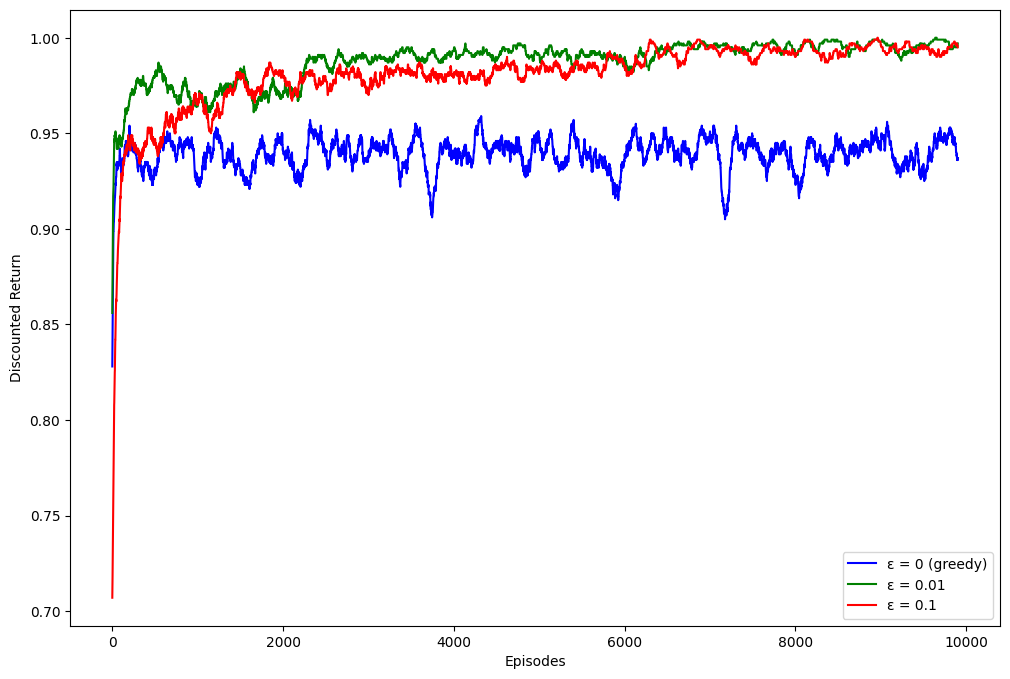

In [17]:
""" CODE HERE YOUR IMPLEMENTATION for Q3-(a) """
# Implementation of the one-policy first-vist Monte-Carlo control (for ε-soft policies) here.
# To debug your code, you can use run_num = 5 and episode_num = 1e3
# To report the finial results, please use run_num = 10 and episode_num = 1e4

from tqdm import tqdm 

#no discount since none of the pdfs talk about discount
def mc_fourrooms(epsilon, run_num=10, episode_num=10000, gamma=1.0):
    env = FourRooms()
    actions = list(env.action_space.keys())
    n_actions = len(actions) #4
    results = np.zeros((run_num, episode_num))

    #to see the progess of the iteration
    for run in tqdm(range(run_num), desc=f"eps={epsilon}"):
        #init q and n
        Q = {}
        N = {}

        for episode in range(episode_num):
            episode_data = []
            state, _, done = env.reset()
            while not done:
                if np.random.random() < epsilon:
                    action = actions[np.random.randint(n_actions)] # exploration so get random action
                else:
                    #exploitation greedy
                    q_vals = [Q.get((tuple(state), a), 0.0) for a in actions]
                    max_q = max(q_vals)
                    best = [a for a, q in zip(actions, q_vals) if q == max_q]
                    action = best[np.random.randint(len(best))]

                #take action and update episode data
                next_state, reward, done = env.step(state, action)
                episode_data.append((tuple(state), action, reward))
                state = next_state

            #calculate return discounted but gamma = 1 so no discount
            G_plot = sum(gamma**t * r for t, (_, _, r) in enumerate(episode_data))
            results[run, episode] = G_plot

            G = 0.0
            visited = set()

            #update Q and N
            for t in range(len(episode_data) - 1, -1, -1):
                #get state, action, reward from episode data
                s, a, r = episode_data[t]
                G = gamma * G + r
                sa = (s, a)
                #update Q and N
                if sa not in visited:
                    visited.add(sa)
                    N[sa] = N.get(sa, 0) + 1
                    Q[sa] = Q.get(sa, 0.0) + (G - Q.get(sa, 0.0)) / N[sa]


    return results

### plotting the four rooms results

run_num = 10
episode_num = 10000


#set different epsilon values for comparison of exploitation and exploration
plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel("Episodes")
ax.set_ylabel("Discounted Return")

window = 100  # smoothing window for better visualization
for data, color, label in zip(
    [results_0, results_001, results_01],
    ["blue", "green", "red"],
    ["ε = 0 (greedy)", "ε = 0.01", "ε = 0.1"]
):
    mean = data.mean(axis=0)
    smoothed = np.convolve(mean, np.ones(window)/window, mode='valid')
    ax.plot(range(len(smoothed)), smoothed, color=color, label=label)

ax.legend()
plt.show()
                

## Q5: Racktrack

Please note, we provde you with the implementation of the two Racetrack domains in the Figure 5.5.

In [18]:
# Define the Racetrack domain 1
racetrack_v1_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]])

racetrack_v2_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

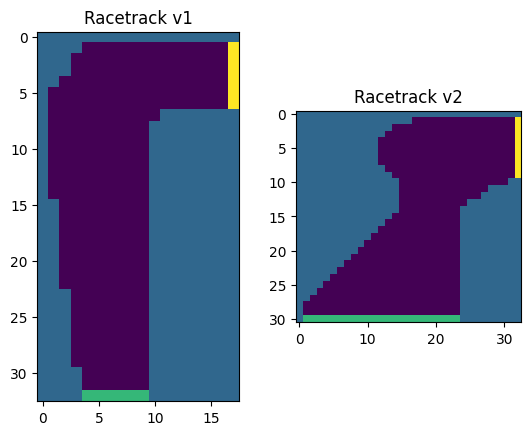

In [19]:
fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()

In [20]:
"""Implementation of the Racetrack environment. Do not change"""
class Racetrack(object):
    def __init__(self, version):
        # Load the pre-defined the domain having the following representation
        #   - 1: track cell
        #   - 0: empty cell
        #   - 2: empty cell on the start line
        #   - 3: empty cell on the finish line
        if version == "v1":
            self.domain_arr = racetrack_v1_arr.copy()
        else:
            self.domain_arr = racetrack_v2_arr.copy()

        # domain size
        self.height, self.width = self.domain_arr.shape

        # State space consists of:
        # Agent location
        self.empty_cell_locs = self.render_cell_locations(val=0.0)
        self.track_cell_locs = self.render_cell_locations(val=1.0)
        self.start_cell_locs = self.render_cell_locations(val=2.0)
        self.finish_cell_locs = self.render_cell_locations(val=3.0)

        # Action space
        self.action_space = [[-1, -1], [-1, 0], [-1, 1],
                             [0, -1], [0, 0], [0, 1],
                             [1, -1], [1, 0], [1, 1]]

        # construct the state space
        self.state_space = []
        for loc in self.start_cell_locs + self.empty_cell_locs + self.finish_cell_locs:
            for i in range(5):
                for j in range(5):
                    self.state_space.append(loc + [i, j])

        # track the agent's location
        self.state = None
        self.action = None
        self.t = None

    def reset(self):
        # randomly select one cell from the start line
        start_loc = random.sample(self.start_cell_locs, 1)[0]
        # reset the velocity to be zero for both x and y directions
        start_vel = [0, 0]
        # the state is a combination of location and velocity
        # for example: [loc_x, loc_y, vel_x, vel_y]
        state = start_loc + start_vel
        # reward
        reward = None
        # done
        done = False
        # track agent's location
        self.state = tuple(state)
        self.t = 0
        return state, reward, done

    def step(self, state, action):
        """
        Args:
            state (list): a list variable consists of agent's location + agent's current velocity. e.g., [x, y, v_x, v_y]
            action (list): a list variable consists of agent's velocity increments. e.g., [increments_v_x, increments_v_y]
        """
        # reward is -1 for every time step until the agent passes the finish line
        reward = -1
        self.t += 1
        
        # with the probability = 0.1, set action = [0, 0]
        if np.random.random() < 0.1:
            action = [0, 0]

        # update the velocity components
        # note that, both velocity is discrete and constraint within [0, 4]
        next_vel_x = np.clip(state[2] + action[0], a_min=0, a_max=4)
        next_vel_y = np.clip(state[3] + action[1], a_min=0, a_max=4)
        next_state_vel = [next_vel_x, next_vel_y]

        # only the cells on the start line can have both 0 velocities
        if next_state_vel == [0, 0]:
            if state not in self.start_cell_locs:
                # non-zero for velocities
                if state[2] == 0 and state[3] != 0:
                    next_state_vel = [0, 1]
                if state[2] != 0 and state[3] == 0:
                    next_state_vel = [1, 0]
                if state[2] != 0 and state[3] != 0:
                    non_zero_idx = random.sample([0, 1], 1)[0]
                    next_state_vel[non_zero_idx] = 1

        # update the next state location based on the updated velocities
        next_state_loc = [np.clip(state[0] + next_state_vel[0], a_min=0, a_max=self.width-1),
                          np.clip(state[1] + next_state_vel[1], a_min=0, a_max=self.height-1)]

        # check whether the agent hits the track
        if next_state_loc in self.track_cell_locs:
            # move back to the start line
            next_state_loc = random.sample(self.start_cell_locs, 1)[0]
            # reduce velocity to be 0s
            next_state_vel = [0, 0]
            # episode continue
            done = False
            # next state
            next_state = next_state_loc + next_state_vel
            return next_state, reward, done

        # check whether the agent pass the finish line
        if next_state_loc in self.finish_cell_locs:
            next_state = next_state_loc + next_state_vel
            done = True
            return next_state, 0, done

        # otherwise combine the next state
        next_state = next_state_loc + next_state_vel
        # termination
        done = False

        # track the agent's state
        self.state = tuple(next_state)
        self.action = action
        return next_state, reward, done

    def render_cell_locations(self, val):
        row_loc_indices, col_loc_indices = np.where(self.domain_arr == val)
        cell_locations = [[c, (self.height-1) - r] for r, c in zip(row_loc_indices, col_loc_indices)]
        return cell_locations

    def render(self):
        plt.clf()
        plt.title(f"s = {self.state}, a = {self.action}")
        plot_arr = self.domain_arr.copy()
        plot_arr[(self.height - 1) - self.state[1], self.state[0]] = 4
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.01)

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy (epsilon = 0.1)
    - Plot the learning curves for the two tracks.
    - Use running trials number = 10 and episodes number = 2000

v2 eps=0.1: 100%|██████████| 10/10 [00:58<00:00,  5.86s/it]


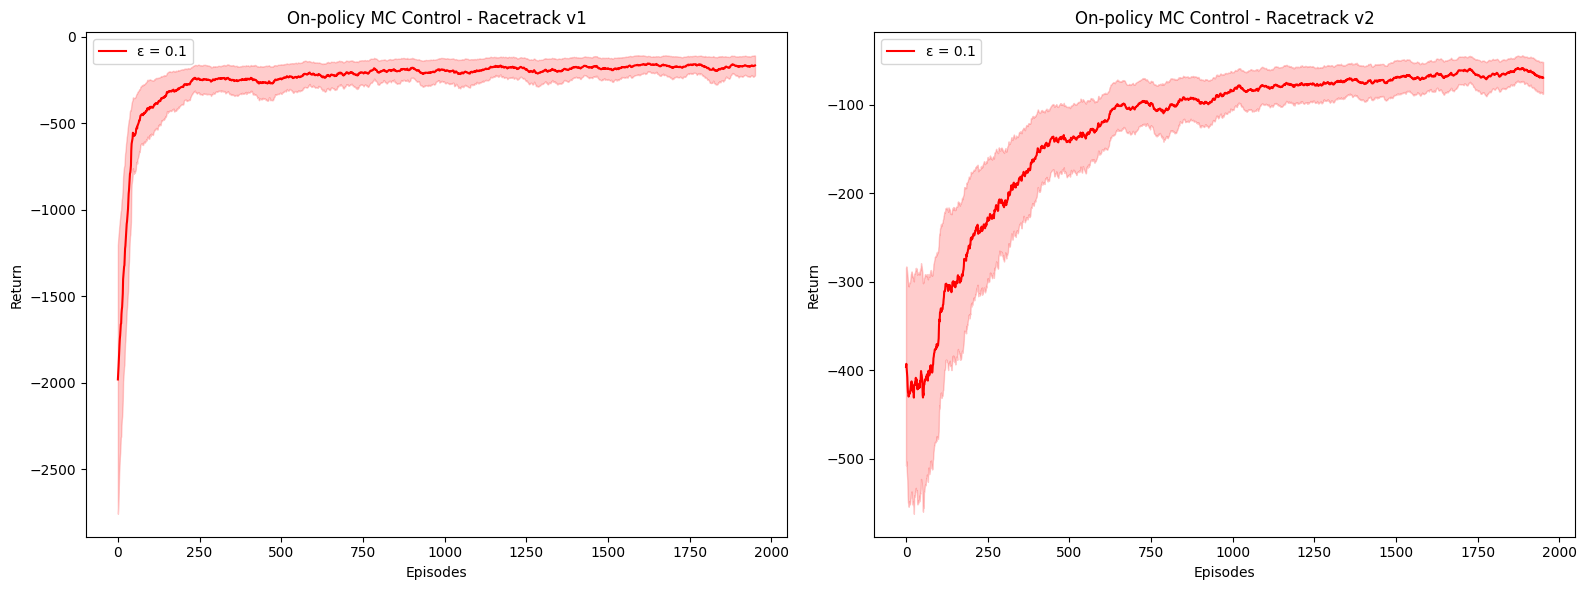

In [26]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(a) """
# Implement here and use the plotting function above to plot the learning curve 

#again to see the progress in loop
from tqdm import tqdm


def mc_control_racetrack(version, epsilon=0.1, run_num=10, episode_num=2000, gamma=1.0):

    #setup env and actions
    env = Racetrack(version)
    actions = env.action_space
    n_action = len(actions)
    results = np.zeros((run_num, episode_num))
    
    #iterate thorugh
    for run in tqdm(range(run_num), desc=f'{version} eps={epsilon}'):
        
        #define Q and N
        Q = {}
        N = {}

        #iterate throught each episode
        for episode in range(episode_num):
            episode_data = []
            state, _, done = env.reset()

            while not done:
                s_key = tuple(state)

                #exploration
                if np.random.random() < epsilon:
                    action = actions[np.random.randint(n_action)] #get random action for exploration
                
                #else exploitation the greeedy and argmax
                else:
                    q_vals = [Q.get((s_key, tuple(a)), 0.0) for a in actions]
                    max_q = max(q_vals)
                    best = [i for i, q in enumerate(q_vals) if q == max_q]
                    action = actions[best[np.random.randint(len(best))]]
                
                #update the episode data and step in environemnt
                next_state, reward, done = env.step(state, action)
                episode_data.append((s_key, tuple(action), reward))
                state = next_state

            #total return sum of discounted reward

            G_plot = sum(gamma**t * r for t, (_, _, r) in enumerate(episode_data))
            results[run, episode] = G_plot

            #first visit mc update
            G = 0.0
            visited = set() #keep track if its visite or not each episode

            for t in range(len(episode_data)-1,-1,-1):
                #add state action reward to episode data each episode
                s, a, r  = episode_data[t]
                G = (gamma * G) + r 
                sa = (s,a)
                #if state action pair not visited
                if sa not in visited:
                    visited.add(sa)
                    N[sa] = N.get(sa, 0) + 1
                    Q[sa] = Q.get(sa,0.0) + (G -Q.get(sa,0.0)) / N[sa]

    return results
                
#hyperparameters
run_num = 10
episode_num = 2000

#both tracks v1 and v2
results_v1 = mc_control_racetrack("v1", epsilon=0.1, run_num=run_num, episode_num=episode_num)
results_v2 = mc_control_racetrack("v2", epsilon=0.1, run_num=run_num, episode_num=episode_num)

# plot learning curves
window = 50
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for ax, data, title in zip(axes, [results_v1, results_v2], ["Racetrack v1", "Racetrack v2"]):
    mean = data.mean(axis=0)
    std_err = data.std(axis=0) / np.sqrt(run_num)
    smoothed = np.convolve(mean, np.ones(window)/window, mode='valid')
    err_smoothed = np.convolve(std_err, np.ones(window)/window, mode='valid')
    x = range(len(smoothed))
    ax.plot(x, smoothed, color="red", label="ε = 0.1")
    ax.fill_between(x, smoothed - err_smoothed, smoothed + err_smoothed, alpha=0.2, color="red")
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Return")
    ax.set_title(f"On-policy MC Control - {title}")
    ax.legend()
plt.tight_layout()
plt.show()


## (b): Implement off-policy Monte-Carlo control. Please specify what behavior policy you are using.
    - Plot the learning curves for the two tracks
    - Using running trials number = 10 and episodes number = 2000

v2 off-policy: 100%|██████████| 10/10 [01:47<00:00, 10.74s/it]


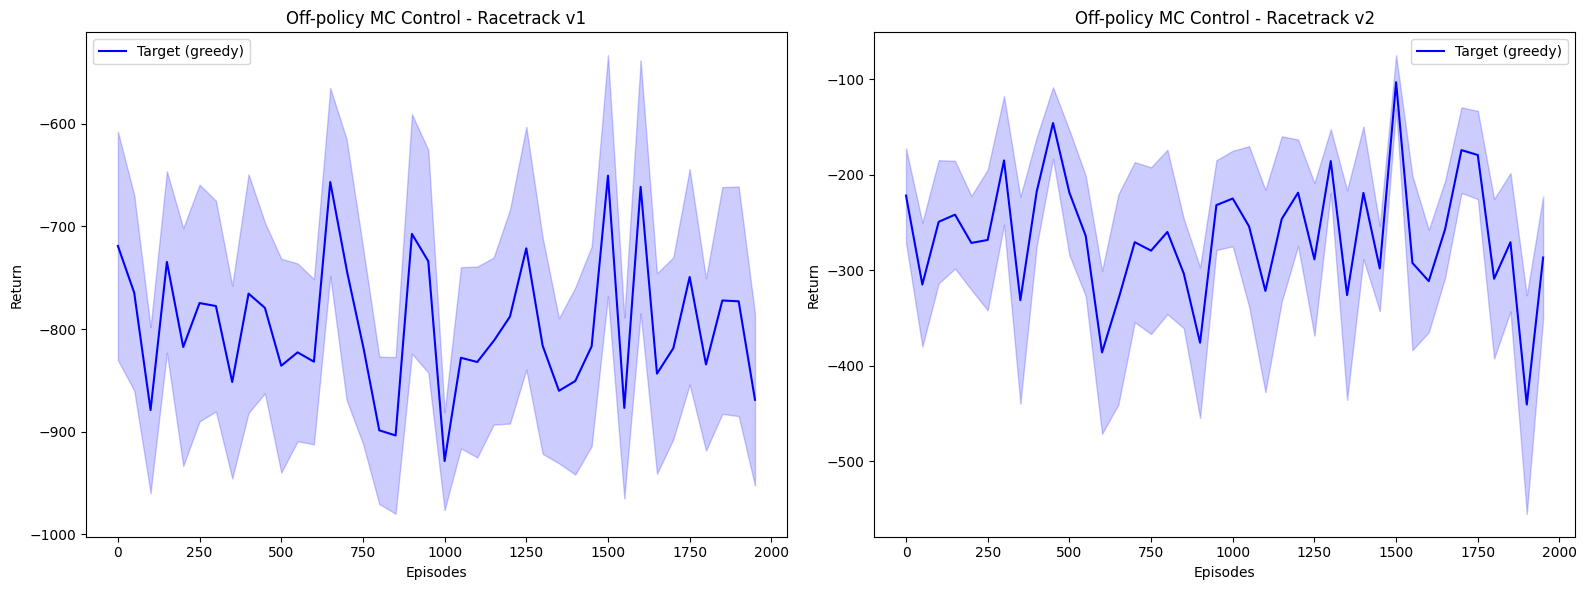

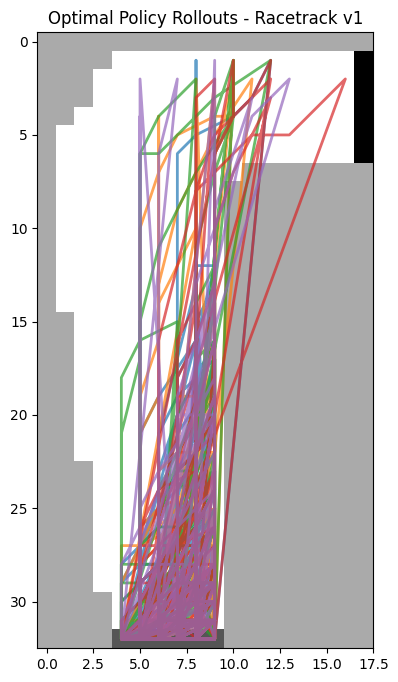

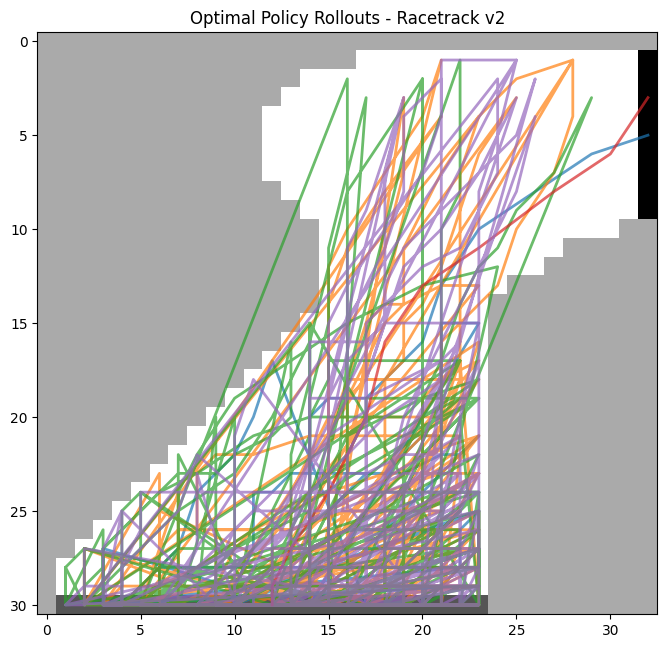

In [29]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(b) """
# Implement here and use the plotting function above to plot the learning curve 


def offpolicy_mc_racetrack(version, epsilon=0.1, run_num=10, episode_num=2000, gamma=1.0, eval_every=50):
    env = Racetrack(version)
    actions = env.action_space
    n_actions = len(actions)
    results_target = np.zeros((run_num, episode_num))

    for run in tqdm(range(run_num), desc=f'{version} off-policy'):
        Q = {}
        C = {}

        def greedy_action(state):
            s_key = tuple(state)
            q_vals = [Q.get((s_key, tuple(a)), 0.0) for a in actions]
            max_q = max(q_vals)
            best = [i for i, q in enumerate(q_vals) if q == max_q]
            return actions[best[np.random.randint(len(best))]]

        last_eval = None
        for episode in range(episode_num):
            # generate episode using behavior policy (epsilon-greedy)
            episode_data = []
            state, _, done = env.reset()
            while not done:
                s_key = tuple(state)
                if np.random.random() < epsilon:
                    action = actions[np.random.randint(n_actions)]
                else:
                    action = greedy_action(state)
                next_state, reward, done = env.step(state, action)
                episode_data.append((s_key, tuple(action), reward))
                state = next_state

            # off-policy MC update with weighted importance sampling
            G = 0.0
            W = 1.0
            for t in range(len(episode_data) - 1, -1, -1):
                s, a, r = episode_data[t]
                G = gamma * G + r
                sa = (s, a)
                C[sa] = C.get(sa, 0.0) + W
                Q[sa] = Q.get(sa, 0.0) + (W / C[sa]) * (G - Q.get(sa, 0.0))

                greedy_a = tuple(greedy_action(list(s)))
                if a != greedy_a:
                    break
                q_vals = [Q.get((s, tuple(act)), 0.0) for act in actions]
                max_q = max(q_vals)
                n_greedy = sum(1 for q in q_vals if q == max_q)
                b_prob = (1 - epsilon) / n_greedy + epsilon / n_actions
                W = W * (1.0 / n_greedy) / b_prob

            # evaluate target policy only every eval_every episodes
            if episode % eval_every == 0:
                state, _, done = env.reset()
                eval_return = 0.0
                t = 0
                while not done and t < 1000:
                    action = greedy_action(state)
                    next_state, reward, done = env.step(state, action)
                    eval_return += gamma**t * reward
                    state = next_state
                    t += 1
                last_eval = eval_return
            results_target[run, episode] = last_eval

    return results_target

# run for both tracks
run_num = 10
episode_num = 2000
results_t_v1 = offpolicy_mc_racetrack("v1")
results_t_v2 = offpolicy_mc_racetrack("v2")

# plot learning curves
window = 50
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for ax, tgt, title in zip(axes, [results_t_v1, results_t_v2], ["Racetrack v1", "Racetrack v2"]):
    mean_t = tgt.mean(axis=0)
    std_t = tgt.std(axis=0) / np.sqrt(run_num)
    sm_t = np.convolve(mean_t, np.ones(window)/window, mode='valid')
    err_t = np.convolve(std_t, np.ones(window)/window, mode='valid')
    x = range(len(sm_t))
    ax.plot(x, sm_t, color="blue", label="Target (greedy)")
    ax.fill_between(x, sm_t - err_t, sm_t + err_t, alpha=0.2, color="blue")
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Return")
    ax.set_title(f"Off-policy MC Control - {title}")
    ax.legend()
plt.tight_layout()
plt.show()

# visualize rollouts of optimal policy on both tracks
gamma = 1.0 
for version, tgt_results, title in [("v1", results_t_v1, "Racetrack v1"), ("v2", results_t_v2, "Racetrack v2")]:
    env = Racetrack(version)
    actions = env.action_space
    # quick train to get Q
    Q = {}
    C = {}
    for ep in range(500):
        episode_data = []
        state, _, done = env.reset()
        while not done:
            s_key = tuple(state)
            if np.random.random() < 0.1:
                action = actions[np.random.randint(len(actions))]
            else:
                q_vals = [Q.get((s_key, tuple(a)), 0.0) for a in actions]
                max_q = max(q_vals)
                best = [i for i, q in enumerate(q_vals) if q == max_q]
                action = actions[best[np.random.randint(len(best))]]
            next_state, reward, done = env.step(state, action)
            episode_data.append((s_key, tuple(action), reward))
            state = next_state
        G = 0.0
        W = 1.0
        for t in range(len(episode_data)-1,-1,-1):
            s, a, r = episode_data[t]
            G = gamma * G + r
            sa = (s, a)
            C[sa] = C.get(sa, 0.0) + W
            Q[sa] = Q.get(sa, 0.0) + (W / C[sa]) * (G - Q.get(sa, 0.0))
            q_vals = [Q.get((s, tuple(act)), 0.0) for act in actions]
            max_q = max(q_vals)
            best_acts = [i for i, q in enumerate(q_vals) if q == max_q]
            greedy_a = tuple(actions[best_acts[np.random.randint(len(best_acts))]])
            if a != greedy_a:
                break
            n_greedy = len(best_acts)
            b_prob = (1-0.1)/n_greedy + 0.1/len(actions)
            W = W * (1.0/n_greedy) / b_prob

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(env.domain_arr, cmap='gray_r')
    ax.set_title(f"Optimal Policy Rollouts - {title}")
    for rollout in range(5):
        state, _, done = env.reset()
        trajectory = [state[:2]]
        t = 0
        while not done and t < 500:
            s_key = tuple(state)
            q_vals = [Q.get((s_key, tuple(a)), 0.0) for a in actions]
            max_q = max(q_vals)
            best = [i for i, q in enumerate(q_vals) if q == max_q]
            action = actions[best[np.random.randint(len(best))]]
            state, _, done = env.step(state, action)
            trajectory.append(state[:2])
            t += 1
        traj = np.array(trajectory)
        rows = (env.height - 1) - traj[:, 1]
        cols = traj[:, 0]
        ax.plot(cols, rows, linewidth=2, alpha=0.7)
    plt.show()